Notebook Setup
---

In [1]:
import os
import sys

In [2]:
%load_ext autoreload
#Now, you can turn on auto-reloading
%autoreload 2

Task 1
---

In [3]:
from CSPclass import *
from utils import parse_neighbors
from algorithms import AC3

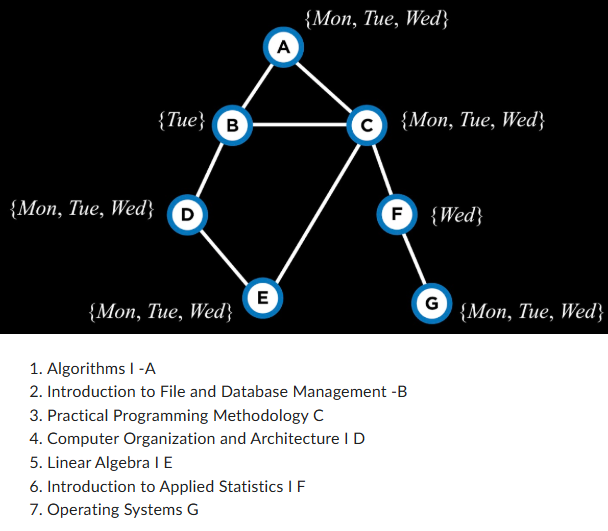

In [4]:
neighbours = parse_neighbors(
    'CS2040: CS2910 CS2010;'\
    'CS2910: CS2010 CS2290;'\
    'CS2010: MA1200 ST1510;'\
    'CS2290: MA1200;'\
    'MA1200: ;'\
    'ST1510: CS3790;'\
    'CS3790: '
)
domains = {
    'CS2040': ['Mon','Tue','Wed'], # Algorithms I
    'CS2910': ['Tue'],             # Introduction to FIle and Database Management
    'CS2010': ['Mon','Tue','Wed'], # Practical Programming Methodology
    'CS2290': ['Mon','Tue','Wed'], # Computer Organization and Architecture I
    'MA1200': ['Mon','Tue','Wed'], # Linear Algebra I
    'ST1510': ['Wed'],             # Introduction to Applied Statistics
    'CS3790': ['Mon','Tue','Wed']  # Operating Systems
}
constraints = lambda X, x, Y, y: x != y

In [5]:
neighbours

defaultdict(list,
            {'CS2040': ['CS2910', 'CS2010'],
             'CS2910': ['CS2040', 'CS2010', 'CS2290'],
             'CS2010': ['CS2040', 'CS2910', 'MA1200', 'ST1510'],
             'CS2290': ['CS2910', 'MA1200'],
             'MA1200': ['CS2010', 'CS2290'],
             'ST1510': ['CS2010', 'CS3790'],
             'CS3790': ['ST1510']})

In [6]:
examCSP = CSPBasic(variables = None, neighbors = neighbours, domains = domains, constraints = constraints)
AC3(examCSP)

Initial queue:
('CS2040', 'CS2910') ('CS2040', 'CS2010') 
('CS2910', 'CS2040') ('CS2910', 'CS2010') ('CS2910', 'CS2290') 
('CS2010', 'CS2040') ('CS2010', 'CS2910') ('CS2010', 'MA1200') ('CS2010', 'ST1510') 
('CS2290', 'CS2910') ('CS2290', 'MA1200') 
('MA1200', 'CS2010') ('MA1200', 'CS2290') 
('ST1510', 'CS2010') ('ST1510', 'CS3790') 
('CS3790', 'ST1510') 
Arc ('CS2040', 'CS2910') is cheking
The val Tue was deleted from CS2040 domain
[('CS2040', 'CS2010'), ('CS2910', 'CS2040'), ('CS2910', 'CS2010'), ('CS2910', 'CS2290'), ('CS2010', 'CS2040'), ('CS2010', 'CS2910'), ('CS2010', 'MA1200'), ('CS2010', 'ST1510'), ('CS2290', 'CS2910'), ('CS2290', 'MA1200'), ('MA1200', 'CS2010'), ('MA1200', 'CS2290'), ('ST1510', 'CS2010'), ('ST1510', 'CS3790'), ('CS3790', 'ST1510'), ('CS2010', 'CS2040')]
Arc ('CS2040', 'CS2010') is cheking
[('CS2910', 'CS2040'), ('CS2910', 'CS2010'), ('CS2910', 'CS2290'), ('CS2010', 'CS2040'), ('CS2010', 'CS2910'), ('CS2010', 'MA1200'), ('CS2010', 'ST1510'), ('CS2290', 'CS2910'

(True, 53)

In [7]:
for course in examCSP.variables:
    #print(course, examCSP.curr_domains[course])
    if course == 'CS2010' or course == 'CS2290' or course == 'MA1200':
        print(course, examCSP.curr_domains[course])

CS2010 ['Mon']
CS2290 ['Mon', 'Wed']
MA1200 ['Tue', 'Wed']


Task 2
---

In [8]:
from CSPclass import *
from utils import parse_neighbors
from algorithms import AC3

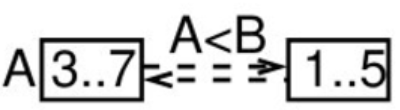

In [9]:
neighbours1 = parse_neighbors('A: B; B: ')
domains1 = {'A': [3,4,5,6,7], 'B': [1,2,3,4,5]}
def abConstraints(X, x, Y, y):
    if X == 'A' and Y == 'B':
        return x < y
    elif X == 'B' and Y == 'A':
        return x > y
    else:
        return None
constraints1 = lambda X, x, Y, y: x < y # NOT USED AS LAMBDA FUNCTIONS ARE ANONYMOUS AND YOU CANNOT EXTRACT THE EXPRESSIONS OF THEM

In [10]:
abCSP = CSPBasic(variables = None, domains = domains1, neighbors = neighbours1, constraints = abConstraints)
AC3(abCSP)

Initial queue:
('A', 'B') 
('B', 'A') 
Arc ('A', 'B') is cheking
The val 5 was deleted from A domain
The val 6 was deleted from A domain
The val 7 was deleted from A domain
[('B', 'A')]
Arc ('B', 'A') is cheking
The val 1 was deleted from B domain
The val 2 was deleted from B domain
The val 3 was deleted from B domain
[]


(True, 32)

In [11]:
for var in abCSP.variables:
    print(var, abCSP.curr_domains[var])

A [3, 4]
B [4, 5]


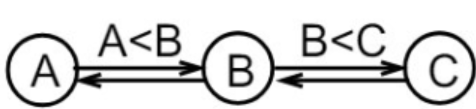

In [12]:
neighbours2 = parse_neighbors('A: B; B: C')
domains2 = {'A': [a for a in range(1,11)], 'B': [b for b in range(5,16)], 'C': [c for c in range(10,21)]}
def abcConstraints(X, x, Y, y):
    if X == 'A' and Y == 'B':
        return x < y
    elif X == 'B' and Y == 'A':
        return x > y
    elif X == 'B' and Y == 'C':
        return x < y
    elif X == 'C' and Y == 'B':
        return x > y
    else:
        return None

In [13]:
abcCSP = CSPBasic(variables = None, domains = domains2, neighbors = neighbours2, constraints = abcConstraints)
AC3(abcCSP)

Initial queue:
('A', 'B') 
('B', 'A') ('B', 'C') 
('C', 'B') 
Arc ('A', 'B') is cheking
[('B', 'A'), ('B', 'C'), ('C', 'B')]
Arc ('B', 'A') is cheking
[('B', 'C'), ('C', 'B')]
Arc ('B', 'C') is cheking
[('C', 'B')]
Arc ('C', 'B') is cheking
[]


(True, 85)

In [14]:
for var in abcCSP.variables:
    print(var, abcCSP.curr_domains[var])

A [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
B [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
C [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


Task 2 Alternate
---

In [15]:
from CSPclass import *
from utils import parse_neighbors
from algorithms import AC3v2

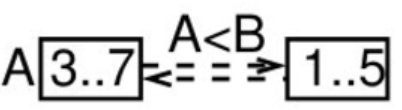

In [16]:
neighbours3 = parse_neighbors('A: B; B: ')
domains3 = {'A': [3,4,5,6,7], 'B': [1,2,3,4,5]}
constraints3 = ['A < B']

In [17]:
abCSP2 = CSPBasic(variables = None, domains = domains3, neighbors = neighbours3, constraints = constraints3)
AC3v2(abCSP2)

Initial queue:
('A', 'B') 
('B', 'A') 
Arc ('A', 'B') is cheking
The val 5 was deleted from A domain
The val 6 was deleted from A domain
The val 7 was deleted from A domain
[('B', 'A')]
Arc ('B', 'A') is cheking
The val 1 was deleted from B domain
The val 2 was deleted from B domain
The val 3 was deleted from B domain
[]


(True, 32)

In [18]:
for var in abCSP2.variables:
    print(var, abCSP2.curr_domains[var])

A [3, 4]
B [4, 5]


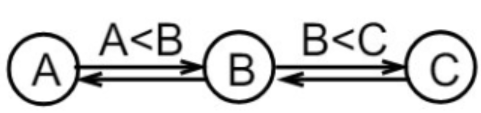

In [19]:
neighbours4 = parse_neighbors('A: B; B: C')
domains4 = {'A': [a for a in range(1,11)], 'B': [b for b in range(5,16)], 'C': [c for c in range(10,21)]}
constraints4 = ['A < B','B < C']

In [20]:
abcCSP2 = CSPBasic(variables = None, domains = domains4, neighbors = neighbours4, constraints = constraints4)
AC3v2(abcCSP2)

Initial queue:
('A', 'B') 
('B', 'A') ('B', 'C') 
('C', 'B') 
Arc ('A', 'B') is cheking
[('B', 'A'), ('B', 'C'), ('C', 'B')]
Arc ('B', 'A') is cheking
[('B', 'C'), ('C', 'B')]
Arc ('B', 'C') is cheking
[('C', 'B')]
Arc ('C', 'B') is cheking
[]


(True, 85)

In [21]:
for var in abcCSP2.variables:
    print(var, abcCSP2.curr_domains[var])

A [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
B [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
C [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


Task 3
---